# Capstone Project - Gold Price prediction 
# (Linear Regression VS Timeseries forecasting)
### Applied Data Science Capstone by Alvaro Zamudio

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Sources](#data_s)
* [Quick view of the Data sources](#data_c)
* [Feature Engineering](#feature_eng)
* [Exploring the Data](#explore)
* [Linear Regression Model](#linear)
* [Time series Forecasting Model](#lstm)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to predict the Gold price using two different methods. Specifically, this report will be targeted to stakeholders involved with daily trade and who might need to know the trend of the gold price.

The first method, the one we expect to perform better, is linear regression: We will try to find a strong correlation between the gold price and some currencies values and also some energy sources prices, as Natural Gas and Brent Oil

In the second method, we will apply a Time series forecasting model to predict the gold price, using LSTM Neural Network to do the job.

We will compare the results of each model at the end of the project and plot the real values with the predicted values of each model and see if we can rely on the prediction for future deployments.

## Data Sources<a name="data_s"></a>

Based on the definition of our problem, factors that will influence our decision are:
* Gold daily price
* Currencies daily values
* Natural Gas daily price
* Oil and its derivatives

Since we are dealing with currencies values, we need to choose one currency to be the reference for the others. We will pick the *Euro* as the unit for all the features we will be using upon this project, since in someway that is one of the most stable currencies in the world.

Our data sources are located on Kaggle, where we found all our data sets, which are:

* Gold daily price
* Brent Crude Oil daily prices
* Crude Oil daily prices
* Heating oil daily prices
* RBOB Gasoline daily prices
* Natural gas daily prices
* Euro daily rates

## Quick view of the Data sources<a name="data_c"></a>

Let's see the content of all the csv files we got and check the dates recorded, since we will need as much data as possible. We will also take a look at the format of the data, and if there's any different we will change it later on.

In [1]:
import pandas as pd
import numpy as np

#### Gold prices

In [2]:
df_gold = pd.read_csv("Gold.csv")
df_gold.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0


In [3]:
print('First record:{}'.format(df_gold['Date'].min()))
print('Last record:{}'.format(df_gold['Date'].max()))
print('Total records:{}'.format(df_gold['Date'].count()))

First record:2000-08-30
Last record:2021-06-09
Total records:5291


Seems good, we have almost 20 years recorded in this data set, we will apply the same quick view on all the others files and we expect a similar range of data

#### Natural Gas prices

In [4]:
df_gas = pd.read_csv("Natural Gas.csv")
df_gas.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.65,4.815,4.63,4.805,4.805,34954.0
1,2000-08-31,4.82,4.870,4.74,4.780,4.780,25787.0


In [5]:
print('First record:{}'.format(df_gas['Date'].min()))
print('Last record:{}'.format(df_gas['Date'].max()))
print('Total records:{}'.format(df_gas['Date'].count()))

First record:2000-08-30
Last record:2021-06-09
Total records:5291


#### Crude Oil prices

In [6]:
df_cruid_oil = pd.read_csv("Crude Oil.csv")
df_cruid_oil.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0


In [7]:
print('First record:{}'.format(df_cruid_oil['Date'].min()))
print('Last record:{}'.format(df_cruid_oil['Date'].max()))
print('Total records:{}'.format(df_cruid_oil['Date'].count()))

First record:2000-08-23
Last record:2021-06-09
Total records:5296


#### Heating Oil prices

In [8]:
df_heating_oil =  pd.read_csv("Heating Oil.csv")
df_heating_oil.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-01,0.985,0.991,0.9705,0.9764,0.9764,14679.0
1,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('First record:{}'.format(df_heating_oil['Date'].min()))
print('Last record:{}'.format(df_heating_oil['Date'].max()))
print('Total records:{}'.format(df_heating_oil['Date'].count()))

First record:2000-09-01
Last record:2021-06-09
Total records:5289


#### RBOB Gasoline prices

In [10]:
df_gasoline =  pd.read_csv("RBOB Gasoline.csv")
df_gasoline.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-11-01,0.889,0.8970,0.882,0.8840,0.8840,16223.0
1,2000-11-02,0.875,0.8876,0.863,0.8688,0.8688,17216.0


In [11]:
print('First record:{}'.format(df_gasoline['Date'].min()))
print('Last record:{}'.format(df_gasoline['Date'].max()))
print('Total records:{}'.format(df_gasoline['Date'].count()))

First record:2000-11-01
Last record:2021-06-09
Total records:5246


#### Brent Crude Oil prices

In [12]:
df_brent_oil = pd.read_csv("Brent Crude Oil.csv")
df_brent_oil.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575.0
1,2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513.0


In [13]:
print('First record:{}'.format(df_brent_oil['Date'].min()))
print('Last record:{}'.format(df_brent_oil['Date'].max()))
print('Total records:{}'.format(df_brent_oil['Date'].count()))

First record:2007-07-30
Last record:2021-06-09
Total records:3492


Oups! This data set unfortunately doesn't have the records before 2007, and we are loosing almost 2000 records, so we must find another data set containing the Brent Crude Oil prices of 2000 onwards, hopefully, Kaggle is fulled with several Data sets we can use and there is this second file containing the Brent Crude Oil prices as well, let's see its content

In [14]:
df_brent_oil_2 = pd.read_csv("BrentOilPrices.csv")
df_brent_oil_2.head(2)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45


In [15]:
df_brent_oil_2.tail(2)

,Date,Price
8552,"Jan 22, 2021",55.22
8553,"Jan 25, 2021",55.44


In [16]:
print('First record:{}'.format(df_brent_oil_2.iloc[0, 0]))
print('Last record:{}'.format(df_brent_oil_2.iloc[-1, 0]))
print('Total records:{}'.format(df_brent_oil_2['Date'].count()))

First record:20-May-87
Last record:Jan 25, 2021
Total records:8554


Good news, now we have far more much data than what we actually need, we just have to change the Date format and we can use the data set

#### Euro Daily rate prices

In [17]:
df_euro_currency =  pd.read_csv("euro-daily-hist_1999_2020.csv")
df_euro_currency.head(2)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013


In [18]:
print('First record:{}'.format(df_euro_currency.iloc[-1, 0]))
print('Last record:{}'.format(df_euro_currency.iloc[0, 0]))
print('Total records:{}'.format(len(df_euro_currency)))

First record:1999-01-04
Last record:2021-05-06
Total records:5781


Great! We have enough data to work with, this dataset still needs some modifications tough, like the columns names, but we will make in the next session, let's summarize what it needs to be done until now

## Feature Engineering <a name="feature_eng"></a>

Here's a list of the modification we need to apply:

* Brent Crude Daily Price:
    * Modify date format of the second data set we used
    * Merge both DataFrames available (We will be using the former one from 2007 until 2021 and the latter one from 2000 until 2007)
* Euro daily rate:
   * Change column names  
   * Select the currencies we are interesting on
* All data sets:
   * Input a real value to the NaNs  

#### Brent Crude Daily Price

First, let's drop the records recorded before 2000, since we can find several dates formats in this data set, we will retrieve the records of the beginning of 2000 using the index number

In [19]:
df_brent_oil_2.head(2)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45


In [20]:
df_brent_oil_2.iloc[3198:3203,:]

,Date,Price
3198,29-Dec-99,25.63
3199,30-Dec-99,24.93
3200,4-Jan-00,23.95
3201,5-Jan-00,23.72
3202,6-Jan-00,23.55


Good, we found it, we well get all the values from the 3200 index

In [21]:
df_brent_oil_2 = df_brent_oil_2.iloc[3200:,:].reset_index(drop=True)
df_brent_oil_2.head(2)

,Date,Price
0,4-Jan-00,23.95
1,5-Jan-00,23.72


Now, we will update the date format, hopefully, there is a incredible Pandas function that do all the work just fine

In [22]:
df_brent_oil_2['Date'] = pd.to_datetime(df_brent_oil_2['Date'])
df_brent_oil_2['Date']

0      2000-01-04
1      2000-01-05
2      2000-01-06
3      2000-01-07
4      2000-01-10
          ...    
5349   2021-01-19
5350   2021-01-20
5351   2021-01-21
5352   2021-01-22
5353   2021-01-25
Name: Date, Length: 5354, dtype: datetime64[ns]

All we need to do now ist to merge both DataFrames, to do so, we will first select the colums we are interested in the older data frame (Date and Close) and then we will merge the records from 2000 to 2007 of the second DataFame

In [23]:
df_brent_oil.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575.0
1,2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513.0


In [24]:
columns_to_keep = ['Date', 'Close']
df_brent_oil = df_brent_oil[columns_to_keep] 
df_brent_oil.columns = ['Date', 'Price in US dollar']
df_brent_oil.head(2)

,Date,Price in US dollar
0,2007-07-30,75.739998
1,2007-07-31,77.050003


In [25]:
df_brent_oil_2.columns = ['Date', 'Price in US dollar']
df_brent_oil_2.head(2)

,Date,Price in US dollar
0,2000-01-04,23.95
1,2000-01-05,23.72


The oldest record of the first Dataset is from 2007-07-30, so in the second DataSet we will retrieve all the records from 2000 until that Date 

In [26]:
df_brent_oil_2 = df_brent_oil_2[df_brent_oil_2['Date'] < '2007-07-30'].reset_index(drop=True)
df_brent_oil_2.head(2)

,Date,Price in US dollar
0,2000-01-04,23.95
1,2000-01-05,23.72


In [27]:
df_brent_oil_2.tail(2)

,Date,Price in US dollar
1937,2007-07-26,77.28
1938,2007-07-27,76.58


And finally we merge boths Data frames using the Concat Function

In [28]:
df_brent_oil_final = pd.concat([df_brent_oil_2, df_brent_oil]).reset_index(drop=True)
df_brent_oil_final.head()

,Date,Price in US dollar
0,2000-01-04 00:00:00,23.95
1,2000-01-05 00:00:00,23.72
2,2000-01-06 00:00:00,23.55
3,2000-01-07 00:00:00,23.35
4,2000-01-10 00:00:00,22.77


Apparently our date format was modified by the concat function but we will just apply the same function used before to solve this

In [29]:
df_brent_oil_final.tail()

,Date,Price in US dollar
5426,2021-06-03,71.309998
5427,2021-06-04,71.889999
5428,2021-06-07,71.489998
5429,2021-06-08,72.220001
5430,2021-06-09,72.220001


In [30]:
df_brent_oil_final['Date'] = pd.to_datetime(df_brent_oil_final['Date'])
df_brent_oil_final.head()

,Date,Price in US dollar
0,2000-01-04,23.95
1,2000-01-05,23.72
2,2000-01-06,23.55
3,2000-01-07,23.35
4,2000-01-10,22.77


The last step is to fill all the NaN values with a real Value, we could simply drop the row but we are not counting with a lot of Data, and I don't feel comfortable training a model with less than 5K rows, so every data we can recycle will be helpful. To fill the NaN values, we will take de mean between the two closest values to it (each one coming from each side) 

In [31]:
print(df_brent_oil_final.isnull().sum())

Date                   0
Price in US dollar    90
dtype: int64


In [32]:
df_brent_oil_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5431 non-null   datetime64[ns]
 1   Price in US dollar  5341 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.0 KB


In [33]:
df_brent_oil_final['Price in US dollar'] = (df_brent_oil_final['Price in US dollar'].ffill()+df_brent_oil_final['Price in US dollar'].bfill())/2

In [34]:
print(df_brent_oil_final.isnull().sum())

Date                  0
Price in US dollar    0
dtype: int64


#### Euro daily rate

Here, we need to change de columns names, and then we will select the ones could be interesting to train the model

In [35]:
df_euro_currency.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

We need to get rid of the [] characters, they won't really help, then we remove the white space at the end of each name and finally we will rename the "Period\Unit:"to "Date"

In [36]:
df_euro_currency.columns = df_euro_currency.columns.str.replace('[', '')
df_euro_currency.columns = df_euro_currency.columns.str.replace(']', '')
df_euro_currency.columns = df_euro_currency.columns.str.rstrip()
df_euro_currency = df_euro_currency.rename(columns={df_euro_currency.columns[0]: 'Date'})
df_euro_currency.head(2)

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013


In [37]:
df_euro_currency.columns

Index(['Date', 'Australian dollar', 'Bulgarian lev', 'Brazilian real',
       'Canadian dollar', 'Swiss franc', 'Chinese yuan renminbi',
       'Cypriot pound', 'Czech koruna', 'Danish krone', 'Estonian kroon',
       'UK pound sterling', 'Greek drachma', 'Hong Kong dollar',
       'Croatian kuna', 'Hungarian forint', 'Indonesian rupiah',
       'Israeli shekel', 'Indian rupee', 'Iceland krona', 'Japanese yen',
       'Korean won', 'Lithuanian litas', 'Latvian lats', 'Maltese lira',
       'Mexican peso', 'Malaysian ringgit', 'Norwegian krone',
       'New Zealand dollar', 'Philippine peso', 'Polish zloty', 'Romanian leu',
       'Russian rouble', 'Swedish krona', 'Singapore dollar',
       'Slovenian tolar', 'Slovak koruna', 'Thai baht', 'Turkish lira',
       'US dollar', 'South African rand'],
      dtype='object')

Based on the next research, we've selected the currencies that might have some correlation with the Gold Price https://www.newgreenfil.com/pages/os-10-paises-que-produzem-mais-ouro, 

In [38]:
currencies = ['Date', 'US dollar', 'Russian rouble', 'Australian dollar', 'Canadian dollar', 'South African rand',
               'Chinese yuan renminbi', 'UK pound sterling', 'Mexican peso', 'Brazilian real']
df_euro_currency = df_euro_currency[currencies]
df_euro_currency.head(2)

,Date,US dollar,Russian rouble,Australian dollar,Canadian dollar,South African rand,Chinese yuan renminbi,UK pound sterling,Mexican peso,Brazilian real
0,2021-05-06,1.2060,89.8825,1.5547,1.4764,17.2081,7.8054,0.86708,24.4195,6.4707
1,2021-05-05,1.2005,89.7964,1.5510,1.4731,17.3013,7.7636,0.86274,24.2675,6.5174


Let's update the columns names

In [39]:
df_euro_currency.columns = ['Date', 'US dollar/EUR', 'Russian rouble/EUR', 'Australian dollar/EUR', 
                            'Canadian dollar/EUR', 'South African rand/EUR',
               'Chinese yuan renminbi/EUR', 'UK pound sterling/EUR', 'Mexican peso/EUR', 'Brazilian real/EUR']
df_euro_currency.head(2)

,Date,US dollar/EUR,Russian rouble/EUR,Australian dollar/EUR,Canadian dollar/EUR,South African rand/EUR,Chinese yuan renminbi/EUR,UK pound sterling/EUR,Mexican peso/EUR,Brazilian real/EUR
0,2021-05-06,1.2060,89.8825,1.5547,1.4764,17.2081,7.8054,0.86708,24.4195,6.4707
1,2021-05-05,1.2005,89.7964,1.5510,1.4731,17.3013,7.7636,0.86274,24.2675,6.5174


Now let's find the NaNs values and modify them 

In [40]:
print(df_euro_currency.isnull().sum())

Date                           0
US dollar/EUR                  0
Russian rouble/EUR             0
Australian dollar/EUR          0
Canadian dollar/EUR            0
South African rand/EUR         0
Chinese yuan renminbi/EUR    268
UK pound sterling/EUR          0
Mexican peso/EUR               0
Brazilian real/EUR           268
dtype: int64


In [41]:
columns_to_numeric = ['US dollar/EUR', 'Russian rouble/EUR', 'Australian dollar/EUR', 
                            'Canadian dollar/EUR', 'South African rand/EUR',
               'Chinese yuan renminbi/EUR', 'UK pound sterling/EUR', 'Mexican peso/EUR', 'Brazilian real/EUR']

Here, we convert the columns to float variables, and if there's any valuen that cant be converted, as a string, we will receive a NaN value

In [42]:
df_euro_currency[columns_to_numeric] = df_euro_currency[columns_to_numeric].apply(pd.to_numeric, errors='coerce')

In [43]:
print(df_euro_currency.isnull().sum())

Date                           0
US dollar/EUR                 62
Russian rouble/EUR            62
Australian dollar/EUR         62
Canadian dollar/EUR           62
South African rand/EUR        62
Chinese yuan renminbi/EUR    329
UK pound sterling/EUR         62
Mexican peso/EUR              62
Brazilian real/EUR           329
dtype: int64


In [44]:
for column in columns_to_numeric:
    df_euro_currency[column] = (df_euro_currency[column].ffill()+df_euro_currency[column].bfill())/2

In [45]:
print(df_euro_currency.isnull().sum())

Date                           0
US dollar/EUR                  0
Russian rouble/EUR             0
Australian dollar/EUR          0
Canadian dollar/EUR            0
South African rand/EUR         0
Chinese yuan renminbi/EUR    268
UK pound sterling/EUR          0
Mexican peso/EUR               0
Brazilian real/EUR           268
dtype: int64


Those NaNs couldn't be changed because there all together, so it's impossible to calculate the mean from the neighbors, but there is no big deal, they are located in the bigginin of 2000 so is not the most important data therefore, we can drop those values

In [46]:
df_euro_currency = df_euro_currency.dropna().reset_index(drop=True)    # Dropping the missing values.
print(df_euro_currency.isnull().sum())

Date                         0
US dollar/EUR                0
Russian rouble/EUR           0
Australian dollar/EUR        0
Canadian dollar/EUR          0
South African rand/EUR       0
Chinese yuan renminbi/EUR    0
UK pound sterling/EUR        0
Mexican peso/EUR             0
Brazilian real/EUR           0
dtype: int64


In [47]:
df_euro_currency.head()

,Date,US dollar/EUR,Russian rouble/EUR,Australian dollar/EUR,Canadian dollar/EUR,South African rand/EUR,Chinese yuan renminbi/EUR,UK pound sterling/EUR,Mexican peso/EUR,Brazilian real/EUR
0,2021-05-06,1.2060,89.8825,1.5547,1.4764,17.2081,7.8054,0.86708,24.4195,6.4707
1,2021-05-05,1.2005,89.7964,1.5510,1.4731,17.3013,7.7636,0.86274,24.2675,6.5174
2,2021-05-04,1.2021,90.2438,1.5608,1.4836,17.4433,7.8136,0.86770,24.4040,6.5785
3,2021-05-03,1.2044,90.7472,1.5573,1.4807,17.3953,7.7967,0.86838,24.4071,6.5507
4,2021-04-30,1.2082,90.7108,1.5581,1.4834,17.3875,7.8134,0.86863,24.2345,6.4597


One last thing, but not least important, we said before that the EUR currency would be our refernece, so we want to know for each day how many Euros does a unit of Gold cost, as we want to know how many Euros does a unit of any currency cost.
In the DataFrame above we have the inverse (how many US dollars does a unit of Euro cost for example) so we just have to do 1/x being x every value in the DataFrame

In [48]:
for column in columns_to_numeric:
    df_euro_currency[column] = 1/df_euro_currency[column]
    
df_euro_currency.columns = ['Date', 'EUR/US dollar', 'EUR/Russian rouble/EUR', 'EUR/Australian dollar', 
                            'EUR/Canadian dollar', 'EUR/South African rand',
               'EUR/Chinese yuan renminbi', 'EUR/UK pound sterling', 'EUR/Mexican peso', 'EUR/Brazilian real']
df_euro_currency.head(2)

,Date,EUR/US dollar,EUR/Russian rouble/EUR,EUR/Australian dollar,EUR/Canadian dollar,EUR/South African rand,EUR/Chinese yuan renminbi,EUR/UK pound sterling,EUR/Mexican peso,EUR/Brazilian real
0,2021-05-06,0.829187,0.011126,0.643211,0.677323,0.058112,0.128116,1.153296,0.040951,0.154543
1,2021-05-05,0.832986,0.011136,0.644745,0.678841,0.057799,0.128806,1.159098,0.041207,0.153435


## All data sets
Now, the easiest part, we just need to modify the NaNs values for the other features, update their columns names and them all together in the same DataFrame, to finally convert their prices (in dollars) to euros and we are ready to Plot their values and get their correlationship

Lets just recall the dataframes to remember who they are and how they look

In [49]:
df_gold.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0


In [50]:
df_cruid_oil.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0


In [51]:
df_gas.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.65,4.815,4.63,4.805,4.805,34954.0
1,2000-08-31,4.82,4.870,4.74,4.780,4.780,25787.0


In [52]:
df_heating_oil.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-01,0.985,0.991,0.9705,0.9764,0.9764,14679.0
1,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_gasoline.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-11-01,0.889,0.8970,0.882,0.8840,0.8840,16223.0
1,2000-11-02,0.875,0.8876,0.863,0.8688,0.8688,17216.0


In [54]:
df_brent_oil_final.head(2)

,Date,Price in US dollar
0,2000-01-04,23.95
1,2000-01-05,23.72


In [55]:
df_euro_currency.head(2)

,Date,EUR/US dollar,EUR/Russian rouble/EUR,EUR/Australian dollar,EUR/Canadian dollar,EUR/South African rand,EUR/Chinese yuan renminbi,EUR/UK pound sterling,EUR/Mexican peso,EUR/Brazilian real
0,2021-05-06,0.829187,0.011126,0.643211,0.677323,0.058112,0.128116,1.153296,0.040951,0.154543
1,2021-05-05,0.832986,0.011136,0.644745,0.678841,0.057799,0.128806,1.159098,0.041207,0.153435


Seems good, we already treated the df_euro_currency and df_brent_oil_final DataFrames, now we're going to select the Date and Close columns, rename them, and fill the NaN values for all the other features

In [56]:
columns_to_keep = ['Date', 'Close']
df_gold = df_gold[columns_to_keep] 
df_cruid_oil = df_cruid_oil[columns_to_keep]
df_gas = df_gas[columns_to_keep]
df_heating_oil = df_heating_oil[columns_to_keep]
df_gasoline = df_gasoline[columns_to_keep]

In [57]:
print(df_gold.isnull().sum())
print(df_cruid_oil.isnull().sum())
print(df_gas.isnull().sum())
print(df_heating_oil.isnull().sum())
print(df_gasoline.isnull().sum())

Date       0
Close    112
dtype: int64
Date       0
Close    107
dtype: int64
Date       0
Close    106
dtype: int64
Date       0
Close    107
dtype: int64
Date       0
Close    105
dtype: int64


In [58]:
df_gold['Close'] = (df_gold['Close'].ffill()+df_gold['Close'].bfill())/2
df_cruid_oil['Close'] = (df_cruid_oil['Close'].ffill()+df_cruid_oil['Close'].bfill())/2
df_gas['Close'] = (df_gas['Close'].ffill()+df_gas['Close'].bfill())/2
df_heating_oil['Close'] = (df_heating_oil['Close'].ffill()+df_heating_oil['Close'].bfill())/2
df_gasoline['Close'] = (df_gasoline['Close'].ffill()+df_gasoline['Close'].bfill())/2

In [59]:
print(df_gold.isnull().sum())
print(df_cruid_oil.isnull().sum())
print(df_gas.isnull().sum())
print(df_heating_oil.isnull().sum())
print(df_gasoline.isnull().sum())

Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64
Date     0
Close    0
dtype: int64


In [60]:
columns_to_keep = ['Date', 'Price in US dollar']
df_gold.columns = columns_to_keep
df_cruid_oil.columns = columns_to_keep
df_gas.columns = columns_to_keep
df_heating_oil.columns = columns_to_keep
df_gasoline.columns = columns_to_keep

Let's set the same format tho all Date columns, it will be important to merge the DataFrames, otherwise it could raise an Error

In [61]:
df_brent_oil_final['Date'] = pd.to_datetime(df_brent_oil_final['Date'])
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_cruid_oil['Date'] = pd.to_datetime(df_cruid_oil['Date'])
df_gas['Date'] = pd.to_datetime(df_gas['Date'])
df_heating_oil['Date'] = pd.to_datetime(df_heating_oil['Date'])
df_gasoline['Date'] = pd.to_datetime(df_gasoline['Date'])

Now, let's merge all the DataFrames, to do so, we can use the Merge function of Pandas, and we set the "how" option as "inner" in orther to drop the values where the Date is nout found in both DataFrames

In [62]:
new_df = pd.merge(df_gold, df_cruid_oil, on='Date', how='inner')
new_df.head()

,Date,Price in US dollar_x,Price in US dollar_y
0,2000-08-30,273.899994,33.400002
1,2000-08-31,278.299988,33.099998
2,2000-09-01,277.000000,33.380001
3,2000-09-04,276.399994,33.590000
4,2000-09-05,275.799988,33.799999


In [63]:
new_df = pd.merge(new_df, df_gas, on='Date', how='inner')
new_df.head()

,Date,Price in US dollar_x,Price in US dollar_y,Price in US dollar
0,2000-08-30,273.899994,33.400002,4.8050
1,2000-08-31,278.299988,33.099998,4.7800
2,2000-09-01,277.000000,33.380001,4.8350
3,2000-09-04,276.399994,33.590000,4.8975
4,2000-09-05,275.799988,33.799999,4.9600


In [64]:
new_df = pd.merge(new_df, df_heating_oil, on='Date', how='inner')
new_df.head()

,Date,Price in US dollar_x,Price in US dollar_y,Price in US dollar_x,Price in US dollar_y
0,2000-09-01,277.000000,33.380001,4.8350,0.97640
1,2000-09-04,276.399994,33.590000,4.8975,0.97805
2,2000-09-05,275.799988,33.799999,4.9600,0.97970
3,2000-09-06,274.200012,34.950001,5.0650,0.99660
4,2000-09-07,274.000000,35.330002,4.9980,1.02950


In [65]:
new_df = pd.merge(new_df, df_gasoline, on='Date', how='inner')
new_df.head()

,Date,Price in US dollar_x,Price in US dollar_y,Price in US dollar_x,Price in US dollar_y,Price in US dollar
0,2000-11-01,263.899994,33.200001,4.686,0.9409,0.8840
1,2000-11-02,264.399994,32.540001,4.760,0.9318,0.8688
2,2000-11-03,264.600006,32.599998,4.910,0.9217,0.8695
3,2000-11-06,264.500000,32.860001,4.849,0.9169,0.8825
4,2000-11-07,264.299988,33.400002,5.080,0.9493,0.8910


In [66]:
new_df = pd.merge(new_df, df_brent_oil_final, on='Date', how='inner')
new_df.head()

,Date,Price in US dollar_x,Price in US dollar_y,Price in US dollar_x,Price in US dollar_y,Price in US dollar_x,Price in US dollar_y
0,2000-11-01,263.899994,33.200001,4.686,0.9409,0.8840,31.62
1,2000-11-02,264.399994,32.540001,4.760,0.9318,0.8688,30.81
2,2000-11-03,264.600006,32.599998,4.910,0.9217,0.8695,30.81
3,2000-11-06,264.500000,32.860001,4.849,0.9169,0.8825,31.00
4,2000-11-07,264.299988,33.400002,5.080,0.9493,0.8910,31.59


In [67]:
new_df.columns = ['Date', 'Gold in US Dollars', 'Cruid Oil in US Dollars', 'Natural Gas in US Dollars',
                  'Heat Oil in US Dollars', 'Gasoline in US Dollars', 'Brent Oil in US Dollars']
new_df.head()

,Date,Gold in US Dollars,Cruid Oil in US Dollars,Natural Gas in US Dollars,Heat Oil in US Dollars,Gasoline in US Dollars,Brent Oil in US Dollars
0,2000-11-01,263.899994,33.200001,4.686,0.9409,0.8840,31.62
1,2000-11-02,264.399994,32.540001,4.760,0.9318,0.8688,30.81
2,2000-11-03,264.600006,32.599998,4.910,0.9217,0.8695,30.81
3,2000-11-06,264.500000,32.860001,4.849,0.9169,0.8825,31.00
4,2000-11-07,264.299988,33.400002,5.080,0.9493,0.8910,31.59


And finally we merge the currencies values

In [68]:
df_euro_currency['Date'] = pd.to_datetime(df_euro_currency['Date'])
df_euro_currency.head(2)

,Date,EUR/US dollar,EUR/Russian rouble/EUR,EUR/Australian dollar,EUR/Canadian dollar,EUR/South African rand,EUR/Chinese yuan renminbi,EUR/UK pound sterling,EUR/Mexican peso,EUR/Brazilian real
0,2021-05-06,0.829187,0.011126,0.643211,0.677323,0.058112,0.128116,1.153296,0.040951,0.154543
1,2021-05-05,0.832986,0.011136,0.644745,0.678841,0.057799,0.128806,1.159098,0.041207,0.153435


In [69]:
new_df = pd.merge(new_df, df_euro_currency, on='Date', how='inner')
new_df.head()

,Date,Gold in US Dollars,Cruid Oil in US Dollars,Natural Gas in US Dollars,Heat Oil in US Dollars,Gasoline in US Dollars,Brent Oil in US Dollars,EUR/US dollar,EUR/Russian rouble/EUR,EUR/Australian dollar,EUR/Canadian dollar,EUR/South African rand,EUR/Chinese yuan renminbi,EUR/UK pound sterling,EUR/Mexican peso,EUR/Brazilian real
0,2000-11-01,263.899994,33.200001,4.686,0.9409,0.8840,31.62,1.169044,0.041965,0.611958,0.766989,0.155630,0.141241,1.691475,0.121979,0.612708
1,2000-11-02,264.399994,32.540001,4.760,0.9318,0.8688,30.81,1.156604,0.041613,0.610501,0.754091,0.154457,0.139737,1.678979,0.121084,0.602882
2,2000-11-03,264.600006,32.599998,4.910,0.9217,0.8695,30.81,1.145475,0.041069,0.605327,0.748839,0.152579,0.138393,1.663063,0.119469,0.595664
3,2000-11-06,264.500000,32.860001,4.849,0.9169,0.8825,31.00,1.153802,0.041432,0.608828,0.752842,0.153461,0.139398,1.668057,0.119330,0.592136
4,2000-11-07,264.299988,33.400002,5.080,0.9493,0.8910,31.59,1.164551,0.041826,0.613497,0.761847,0.152681,0.140696,1.663894,0.120042,0.595522


In [70]:
new_df.count()

Date                         5173
Gold in US Dollars           5173
Cruid Oil in US Dollars      5173
Natural Gas in US Dollars    5173
Heat Oil in US Dollars       5173
Gasoline in US Dollars       5173
Brent Oil in US Dollars      5173
EUR/US dollar                5173
EUR/Russian rouble/EUR       5173
EUR/Australian dollar        5173
EUR/Canadian dollar          5173
EUR/South African rand       5173
EUR/Chinese yuan renminbi    5173
EUR/UK pound sterling        5173
EUR/Mexican peso             5173
EUR/Brazilian real           5173
dtype: int64

As we can see, we have the same number of values for all the features, since we got rid of the NaN values, and we only merge the rows which share a specific date with all the other features

Now, we just have to convert the prices to Euros, and we will be able to work with the DataFrame built, in order to convert the prices, we just have to divide the columns to be converted by the values on "EUR/US dollar"

In [71]:
for column in  new_df.columns.tolist()[1:7]:
    new_df[column] = new_df[column]/new_df['EUR/US dollar']

In [72]:
new_df.head()

,Date,Gold in US Dollars,Cruid Oil in US Dollars,Natural Gas in US Dollars,Heat Oil in US Dollars,Gasoline in US Dollars,Brent Oil in US Dollars,EUR/US dollar,EUR/Russian rouble/EUR,EUR/Australian dollar,EUR/Canadian dollar,EUR/South African rand,EUR/Chinese yuan renminbi,EUR/UK pound sterling,EUR/Mexican peso,EUR/Brazilian real
0,2000-11-01,225.740055,28.399281,4.008404,0.804846,0.756174,27.047748,1.169044,0.041965,0.611958,0.766989,0.155630,0.141241,1.691475,0.121979,0.612708
1,2000-11-02,228.600235,28.134085,4.115496,0.805634,0.751164,26.638326,1.156604,0.041613,0.610501,0.754091,0.154457,0.139737,1.678979,0.121084,0.602882
2,2000-11-03,230.995805,28.459798,4.286430,0.804644,0.759074,26.897130,1.145475,0.041069,0.605327,0.748839,0.152579,0.138393,1.663063,0.119469,0.595664
3,2000-11-06,229.242150,28.479763,4.202628,0.794677,0.764863,26.867700,1.153802,0.041432,0.608828,0.752842,0.153461,0.139398,1.668057,0.119330,0.592136
4,2000-11-07,226.954400,28.680582,4.362196,0.815164,0.765102,27.126333,1.164551,0.041826,0.613497,0.761847,0.152681,0.140696,1.663894,0.120042,0.595522


We are going to update the columns names, the ones we used until now had the purpose of ensure the units we were using at each step but now for a better readability, we can reduce the names 

In [73]:
new_df.columns

Index(['Date', 'Gold in US Dollars', 'Cruid Oil in US Dollars',
       'Natural Gas in US Dollars', 'Heat Oil in US Dollars',
       'Gasoline in US Dollars', 'Brent Oil in US Dollars', 'EUR/US dollar',
       'EUR/Russian rouble/EUR', 'EUR/Australian dollar',
       'EUR/Canadian dollar', 'EUR/South African rand',
       'EUR/Chinese yuan renminbi', 'EUR/UK pound sterling',
       'EUR/Mexican peso', 'EUR/Brazilian real'],
      dtype='object')

In [74]:
new_names_columns = ['Date', 'Gold', 'Cruid Oil', 'Natural Gas', 'Heat Oil', 'Gasoline', 'Brent Oil', 'US dollar',
                     'Russian rouble', 'Australian dollar', 'Canadian dollar', 'South African rand',
                     'Chinese yuan renminbi', 'UK pound sterling', 'Mexican peso', 'Brazilian real']
new_df.columns = new_names_columns
new_df.head()

,Date,Gold,Cruid Oil,Natural Gas,Heat Oil,Gasoline,Brent Oil,US dollar,Russian rouble,Australian dollar,Canadian dollar,South African rand,Chinese yuan renminbi,UK pound sterling,Mexican peso,Brazilian real
0,2000-11-01,225.740055,28.399281,4.008404,0.804846,0.756174,27.047748,1.169044,0.041965,0.611958,0.766989,0.155630,0.141241,1.691475,0.121979,0.612708
1,2000-11-02,228.600235,28.134085,4.115496,0.805634,0.751164,26.638326,1.156604,0.041613,0.610501,0.754091,0.154457,0.139737,1.678979,0.121084,0.602882
2,2000-11-03,230.995805,28.459798,4.286430,0.804644,0.759074,26.897130,1.145475,0.041069,0.605327,0.748839,0.152579,0.138393,1.663063,0.119469,0.595664
3,2000-11-06,229.242150,28.479763,4.202628,0.794677,0.764863,26.867700,1.153802,0.041432,0.608828,0.752842,0.153461,0.139398,1.668057,0.119330,0.592136
4,2000-11-07,226.954400,28.680582,4.362196,0.815164,0.765102,27.126333,1.164551,0.041826,0.613497,0.761847,0.152681,0.140696,1.663894,0.120042,0.595522


## Exploring the Data <a name="explore"></a>

We are going to star by calling the correlation function in order to see which features have a strong correlation with our Target, the gold price

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns                       #visualisation
sns.set(color_codes=True)

,Gold,Cruid Oil,Natural Gas,Heat Oil,Gasoline,Brent Oil,US dollar,Russian rouble,Australian dollar,Canadian dollar,South African rand,Chinese yuan renminbi,UK pound sterling,Mexican peso,Brazilian real
Gold,1.000000,0.587099,-0.255316,0.662075,0.644040,0.665606,-0.522904,-0.654366,0.677572,0.299114,-0.665428,0.195841,-0.858390,-0.767845,-0.213609
Cruid Oil,0.587099,1.000000,0.458394,0.982950,0.976706,0.985681,-0.810545,-0.041479,0.486270,0.260465,-0.126049,-0.404350,-0.434133,-0.381012,0.283468
Natural Gas,-0.255316,0.458394,1.000000,0.382613,0.372343,0.356366,-0.512595,0.418971,-0.235041,-0.204387,0.444202,-0.790822,0.250669,0.116476,0.296593
Heat Oil,0.662075,0.982950,0.382613,1.000000,0.980622,0.994183,-0.783969,-0.123410,0.562651,0.307957,-0.205157,-0.306568,-0.491758,-0.437906,0.231614
Gasoline,0.644040,0.976706,0.372343,0.980622,1.000000,0.987166,-0.787352,-0.094583,0.581972,0.324255,-0.157640,-0.329920,-0.459099,-0.415531,0.255001
Brent Oil,0.665606,0.985681,0.356366,0.994183,0.987166,1.000000,-0.781989,-0.090577,0.577174,0.325973,-0.175515,-0.316999,-0.484790,-0.411632,0.268285
US dollar,-0.522904,-0.810545,-0.512595,-0.783969,-0.787352,-0.781989,1.000000,0.206375,-0.270549,0.115181,0.137283,0.657423,0.501706,0.605157,0.029727
Russian rouble,-0.654366,-0.041479,0.418971,-0.123410,-0.094583,-0.090577,0.206375,1.000000,-0.263898,0.162925,0.876003,-0.403074,0.762147,0.880118,0.769293
Australian dollar,0.677572,0.486270,-0.235041,0.562651,0.581972,0.577174,-0.270549,-0.263898,1.000000,0.724855,-0.211649,0.274042,-0.410966,-0.343768,0.179211
Canadian dollar,0.299114,0.260465,-0.204387,0.307957,0.324255,0.325973,0.115181,0.162925,0.724855,1.000000,0.118897,0.354635,-0.007076,0.149181,0.547587


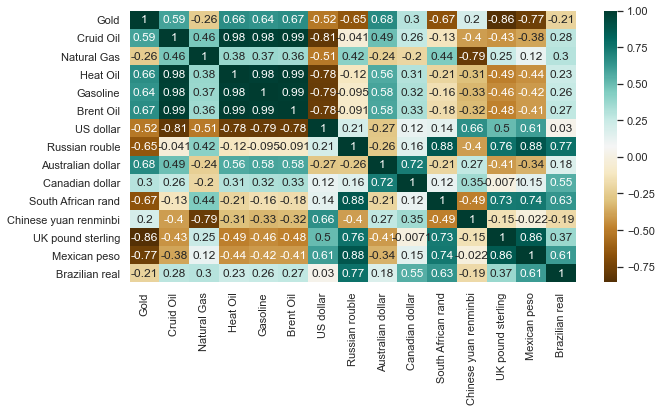

In [76]:
plt.figure(figsize=(10,5))
c= new_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

The results seem to be quite accurate, we can see de US Dollar has a strong negative correlation with the Oil market, we can make a quick search on the internet and confirm that fact. Since we are interested to build a linear regression model using some of those features, we can remove some of them that are not very important such as the Natural Gas, Crude Oil (The Oil market has a strong correlation between its elements, so we are going just to use one of them, in this case the Brent Oil) and some other currencies

Good, we can also check this correlation with the regplot function of seaborn

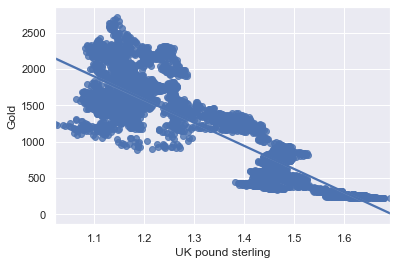

In [77]:
ax = sns.regplot(x="UK pound sterling", y="Gold", data=new_df)

And here we have a wake correlation between the gold prices and the Natural gas prices

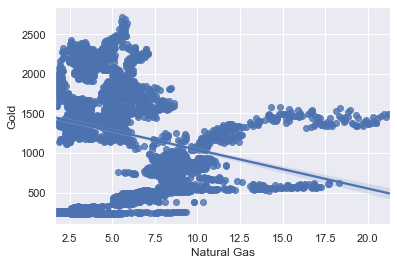

In [78]:
ax = sns.regplot(x="Natural Gas", y="Gold", data=new_df)

In [79]:
new_df = new_df[['Date', 'Gold', 'Brent Oil', 'Russian rouble', 'US dollar','Australian dollar', 'South African rand',
                    'UK pound sterling', 'Mexican peso']] 
new_df.head(3)

,Date,Gold,Brent Oil,Russian rouble,US dollar,Australian dollar,South African rand,UK pound sterling,Mexican peso
0,2000-11-01,225.740055,27.047748,0.041965,1.169044,0.611958,0.155630,1.691475,0.121979
1,2000-11-02,228.600235,26.638326,0.041613,1.156604,0.610501,0.154457,1.678979,0.121084
2,2000-11-03,230.995805,26.897130,0.041069,1.145475,0.605327,0.152579,1.663063,0.119469


Finally, let's take a look at the curve of the gold price alone and then with some other currencies.

In [80]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# we are using the inline backend
%matplotlib inline

In [81]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


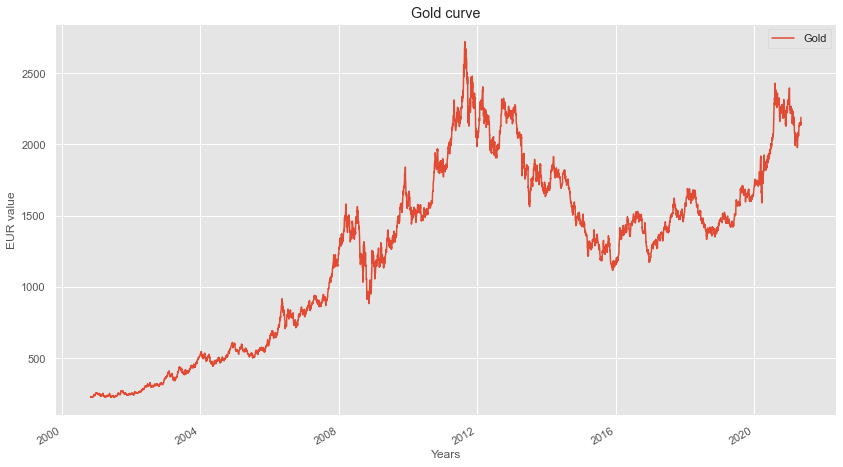

In [82]:
curves_graph = ['Date', 'Gold']
df_gold = new_df.loc[: , curves_graph].set_index('Date')
df_gold.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Gold curve')
plt.ylabel('EUR value')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)

plt.show() 

So far so good, now let's see the same curve with the Mexican peso and the UK pound that are strongly correlated with the gold, and then we are going to plot also the Brent Oil price. Since the magnitude of the prices are very different, first we have to normalize the values, otherwise we'll see only the gold price which is way too high than the others  

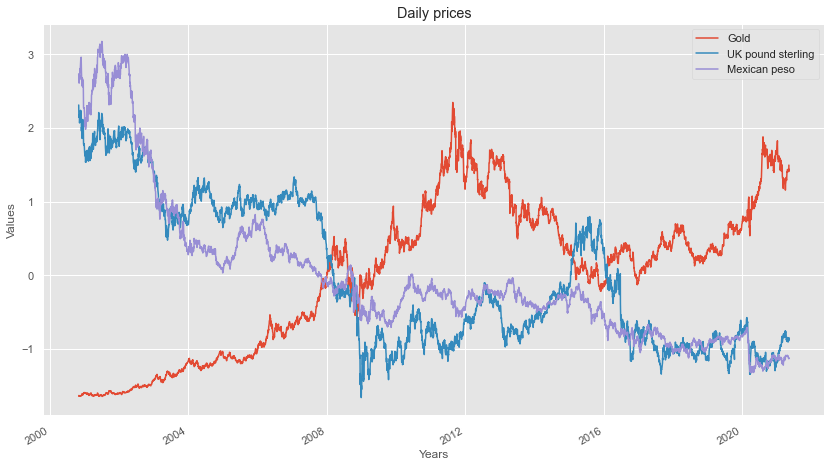

In [83]:
from sklearn import preprocessing

curves_graph = ['Date', 'Gold', 'UK pound sterling', 'Mexican peso']
df_plot = new_df.loc[: , curves_graph].set_index('Date')
df_plot=(df_plot-df_plot.mean())/df_plot.std()

df_plot.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Daily prices')
plt.ylabel('Values')
plt.xlabel('Years')



plt.show() 

Clearly, as the the gold prices go up, the Mexican and UK currencies lose their values, and the same effect happens all the way around

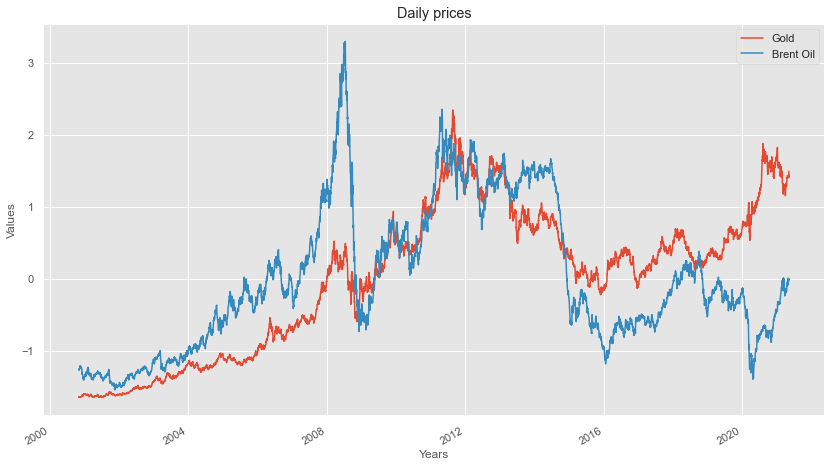

In [84]:
from sklearn import preprocessing

curves_graph = ['Date', 'Gold', 'Brent Oil']
df_plot = new_df.loc[: , curves_graph].set_index('Date')
df_plot=(df_plot-df_plot.mean())/df_plot.std()

df_plot.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Daily prices')
plt.ylabel('Values')
plt.xlabel('Years')


plt.show() 

Here we can see they are some way correlated but when the Brent Oil goes up or down, the gold price do the same but in a different proportion

Now we have finally selected our features, First, we will create a linear regression Model and test the model, and see its performance in the last days that will be compared to the LSTM Time series forecasting model, which will be deployed later on

Since we want to compare both models, we will use the last 14 days recorded to see at the end which one of the models got closer to the real values, if we try to apply a timeseries forecast on a period longer than that the error naturally will start to increase, with that said, **the LR model will be trained and tested with all the data except the last 14 days**, and the Timeseries forecasting model will do it similarly 

Here we will save the last 14 days in a new DataFrame that will be used with both models for evaluation

In [85]:
last_14_prices = new_df.iloc[-14: , :].reset_index(drop=True)
last_14_prices

,Date,Gold,Brent Oil,Russian rouble,US dollar,Australian dollar,South African rand,UK pound sterling,Mexican peso
0,2021-04-19,2129.472929,80.694679,0.010899,0.830910,0.645536,0.058344,1.158011,0.041866
1,2021-04-20,2141.824289,80.223507,0.010837,0.829807,0.645494,0.058043,1.158816,0.041713
2,2021-04-21,2152.014669,78.429724,0.010860,0.832848,0.642921,0.058326,1.159420,0.041832
3,2021-04-22,2145.633461,78.780842,0.010950,0.830151,0.641807,0.058022,1.151344,0.041653
4,2021-04-23,2144.128200,79.768327,0.011071,0.828775,0.641437,0.058117,1.150682,0.041762
5,2021-04-26,2150.163141,79.338027,0.011040,0.827472,0.644413,0.057991,1.149756,0.041699
6,2021-04-27,2149.246400,80.288494,0.011043,0.827267,0.643791,0.057676,1.150814,0.041523
7,2021-04-28,2140.252341,81.194886,0.011108,0.828500,0.642013,0.057751,1.149584,0.041369
8,2021-04-29,2144.528461,83.156422,0.011104,0.824470,0.642921,0.057886,1.150616,0.041262
9,2021-04-30,2135.251919,81.251450,0.011024,0.827678,0.641807,0.057513,1.151238,0.041263


## Linear Regression Model <a name="linear"></a>

For the linear regression, let's firts take the data we can work with and make a quick view of it

In [86]:
df_train_test = new_df.iloc[:-14 , :].reset_index(drop=True)
df_train_test.tail()

,Date,Gold,Brent Oil,Russian rouble,US dollar,Australian dollar,South African rand,UK pound sterling,Mexican peso
5154,2021-04-12,2060.820422,75.328511,0.010874,0.840054,0.640492,0.057512,1.155829,0.041721
5155,2021-04-13,2077.279462,75.741830,0.010888,0.840619,0.638896,0.057396,1.153429,0.041623
5156,2021-04-14,2075.634389,79.656314,0.011044,0.835841,0.642632,0.057807,1.150510,0.041579
5157,2021-04-15,2113.183829,80.127182,0.010842,0.835422,0.647333,0.058667,1.152698,0.041762
5158,2021-04-16,2132.309400,80.030518,0.011002,0.834307,0.646872,0.058491,1.152167,0.041875


In [87]:
df_train_test.head(2)

,Date,Gold,Brent Oil,Russian rouble,US dollar,Australian dollar,South African rand,UK pound sterling,Mexican peso
0,2000-11-01,225.740055,27.047748,0.041965,1.169044,0.611958,0.155630,1.691475,0.121979
1,2000-11-02,228.600235,26.638326,0.041613,1.156604,0.610501,0.154457,1.678979,0.121084


Now, let's split up our data, we will train the model with 70% of the data and test it with the rest of it

In [88]:
msk = np.random.rand(len(df_train_test)) < 0.7
train = df_train_test[msk]
test = df_train_test[~msk]

Now we select our target in the Y variables, and the features in the X variables

In [89]:
train_x = train[['Brent Oil', 'Russian rouble', 'US dollar',
       'Australian dollar', 'South African rand', 'UK pound sterling',
       'Mexican peso']]
train_y = train[['Gold']]

test_x = test[['Brent Oil', 'Russian rouble', 'US dollar',
       'Australian dollar', 'South African rand', 'UK pound sterling',
       'Mexican peso']]
test_y = test[['Gold']]

To star, Using the Pipeline function, we are going to build a Non-linear model of degree=2, scale the inputs for a better performance, and finally apply the Linear Regression model

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [91]:
#Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=1)), ('model',LinearRegression())]
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model',LinearRegression())]

In [92]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Now, we just have to fit the model, tests it with the test data and evaluate the results based on its R2-score and MSE (Residual sum of squares) results

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pipe.fit(train_x,train_y)
ypipe=pipe.predict(test_x)

print("R2-score: %.2f" % r2_score(test_y,ypipe ) )
print('Residual sum of squares (MSE): %.2f' % mean_squared_error(test_y, ypipe))


R2-score: 0.97
Residual sum of squares (MSE): 12684.15


Look good, a 0.97 score is a excellent value, in order to see a better view of the perfromance of the model, one way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values. Let's plot it!

C:\Users\Usuario\anaconda3\envs\data_1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\envs\data_1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


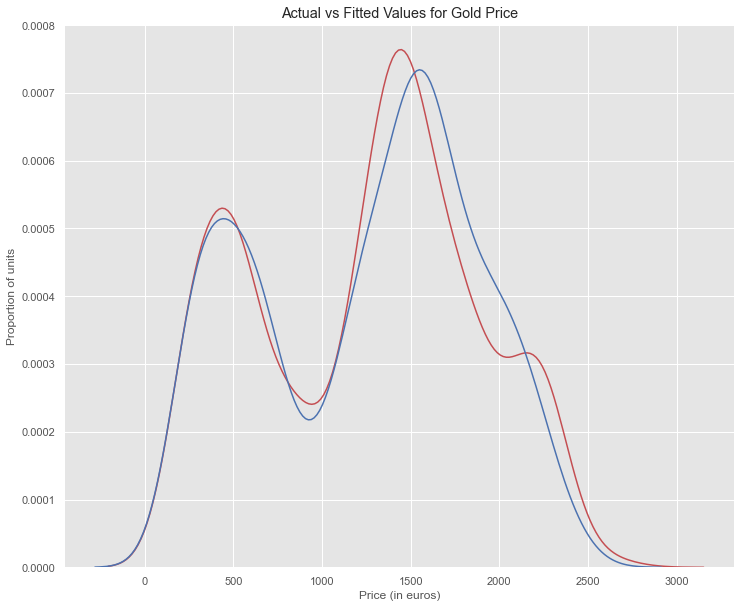

In [94]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(test_y, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Gold Price')
plt.xlabel('Price (in euros)')
plt.ylabel('Proportion of units')

plt.show()
plt.close()

Clearly our model is accurate but we can improve it, before taking a look at the parameter we can change, let's use a residual plot, If the points in the residual plot are randomly spread out around the x-axis, then the degrre we selected for our non-linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the model is a good fit for this data.

C:\Users\Usuario\anaconda3\envs\data_1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


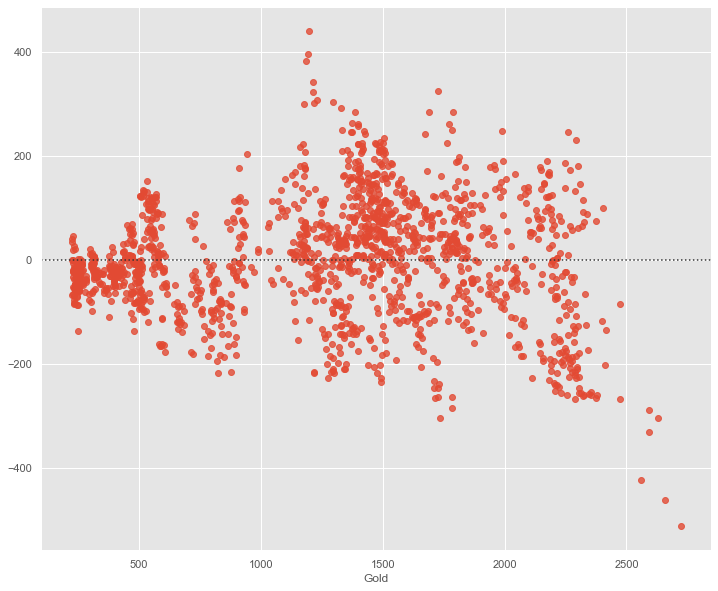

In [95]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(test_y, ypipe)
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that there is room for experiments with the parameters

Here we're going to set a GridSearch by our selves to find the best combination of parameters that fits the better our model. 

In [96]:
from sklearn.model_selection import cross_val_score 
degrees = [1, 2, 3, 4, 5, 6] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
include_bias = [True, False] # Change normalize hyperparameter here
best_score = 0
min_mse = 10000000000
for degree in degrees:
    for normalize in normalizes:
        for include_bia in include_bias:
            Input=[('scale',StandardScaler()), 
                   ('polynomial', PolynomialFeatures(include_bias=include_bia, degree=degree)), 
                   ('model',LinearRegression(normalize=normalize))]
            pipe=Pipeline(Input)
            pipe
            pipe.fit(train_x,train_y)
            ypipe=pipe.predict(test_x)
            
            if r2_score(test_y,ypipe )  > best_score:
                best_score = r2_score(test_y,ypipe ) 
                best_degree_score = degree
                best_normalize_score = normalize
                best_bias_score = include_bia
                
            if mean_squared_error(test_y, ypipe) < min_mse:
                min_mse = mean_squared_error(test_y, ypipe) 
                best_degree_mse = degree
                best_normalize_mse = normalize
                best_bias_mse = include_bia

In [97]:
print('Best score:{}'.format(best_score))
print('Best Degree for this score:{}'.format(best_degree_score))
print('Best normalize for this  score:{}'.format(best_normalize_score))
print('Best Include_Bias for this  score:{}'.format(best_bias_score))

Best score:0.9964859834163097
Best Degree for this score:5
Best normalize for this  score:True
Best Include_Bias for this  score:True


In [98]:
print('Best mse:{}'.format(min_mse))
print('Best Degree for this mse:{}'.format(best_degree_mse))
print('Best normalize for this mse:{}'.format(best_normalize_mse))
print('Best Include_Bias for this mse:{}'.format(best_bias_mse))

Best mse:1366.2774382040645
Best Degree for this mse:5
Best normalize for this mse:True
Best Include_Bias for this mse:True


Well, it seems that we should set the normalize and Include_bias options as 'True' and the best degree must be set to 5 

In [99]:
Input=[('scale',StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=True, degree=5)), 
       ('model',LinearRegression(normalize=True))]
pipe=Pipeline(Input)
pipe
pipe.fit(train_x,train_y)
ypipe=pipe.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y,ypipe ) )
print('Residual sum of squares (MSE): %.2f' % mean_squared_error(test_y, ypipe))

R2-score: 1.00
Residual sum of squares (MSE): 1366.28


We have amost a maximum R2-score, that's supper accurate! Let's plot the distribution plot and the residual plot graphs to see the performance of this new model

C:\Users\Usuario\anaconda3\envs\data_1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\envs\data_1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


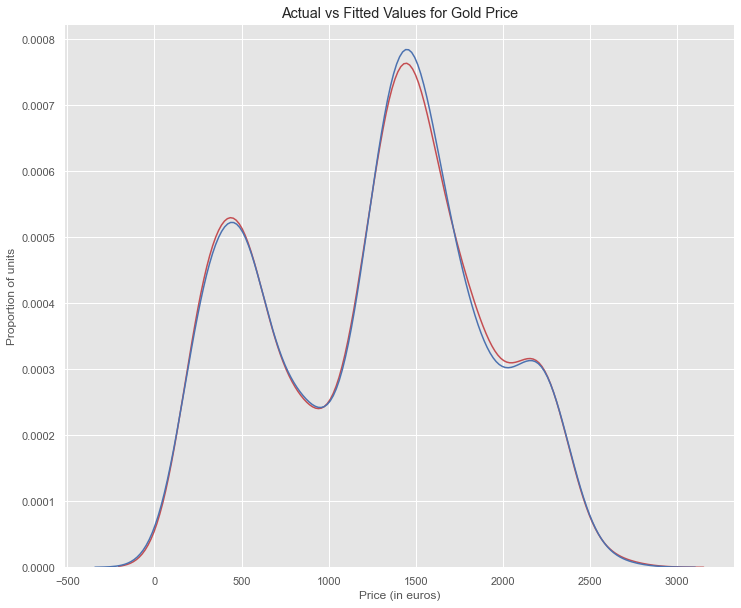

In [100]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(test_y, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Gold Price')
plt.xlabel('Price (in euros)')
plt.ylabel('Proportion of units')

plt.show()
plt.close()

Looks good! We can barely see there's two lines! The predicted values and the real varues are very close

C:\Users\Usuario\anaconda3\envs\data_1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


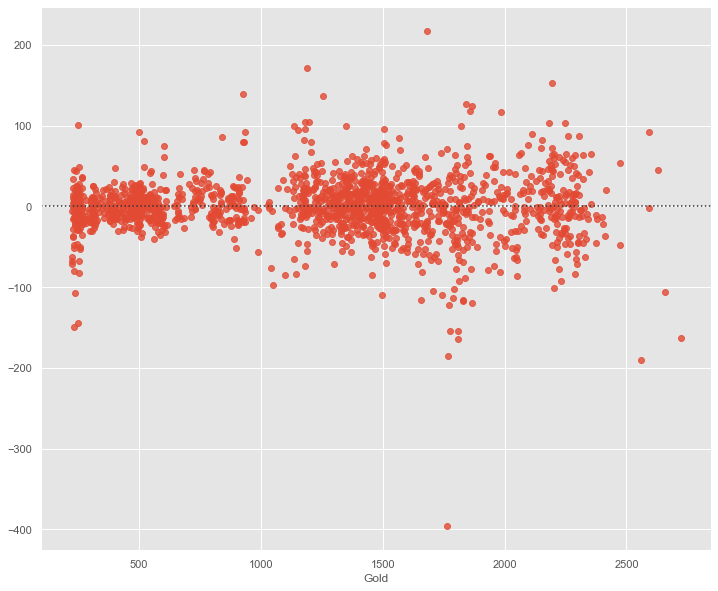

In [101]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(test_y, ypipe)
plt.show()

We can see from this residual plot that the residuals are more randomly spread around the x-axis than the last time, we can trust this model, so let's see how is it performance with the last 14 days recorded we save back in the time for testing and compare results later on

In [102]:
last_14_prices.head(2)

,Date,Gold,Brent Oil,Russian rouble,US dollar,Australian dollar,South African rand,UK pound sterling,Mexican peso
0,2021-04-19,2129.472929,80.694679,0.010899,0.830910,0.645536,0.058344,1.158011,0.041866
1,2021-04-20,2141.824289,80.223507,0.010837,0.829807,0.645494,0.058043,1.158816,0.041713


In [103]:
features_last_14 = last_14_prices[['Brent Oil', 'Russian rouble', 'US dollar',
       'Australian dollar', 'South African rand', 'UK pound sterling',
       'Mexican peso']]
y_predicted=pipe.predict(features_last_14)

In [104]:
#print("R2-score: %.2f" % r2_score(last_14_prices['Gold'], y_predicted ) )
print('Residual sum of squares (MSE): %.2f' % mean_squared_error(last_14_prices['Gold'], y_predicted))

Residual sum of squares (MSE): 2425.17


Our MSE is bigger than our mse for the testind data, but that was already expected, let's plot to see the results

In [105]:
last_14_prices['Gold_LR_Pred'] = y_predicted

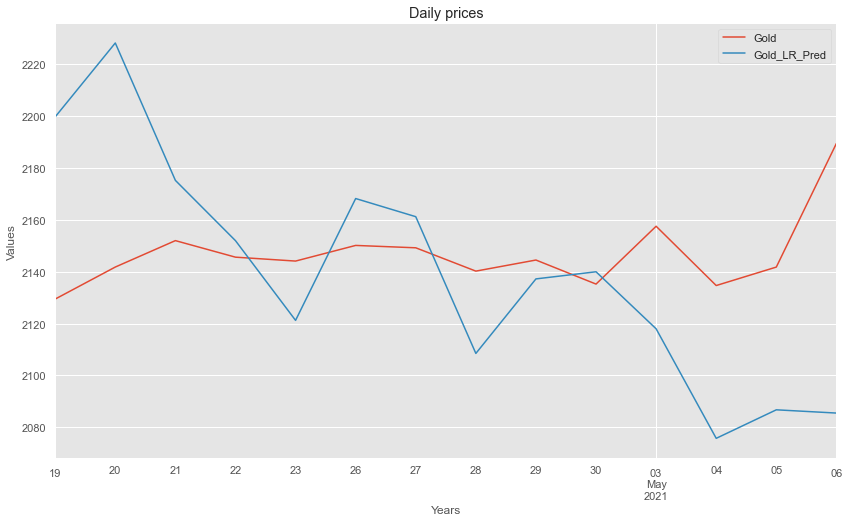

In [106]:
from sklearn import preprocessing

curves_graph = ['Date', 'Gold', 'Gold_LR_Pred']
df_plot = last_14_prices.loc[: , curves_graph].set_index('Date')
#df_plot=(df_plot-df_plot.mean())/df_plot.std()

df_plot.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Daily prices')
plt.ylabel('Values')
plt.xlabel('Years')


plt.show() 

Although our model had a pretty great performance with our test data, it wasn't that accurate when predicting the last 14 days recorded, but still got really close to the real values, Now, let's put this model apart and built the LSTM model

## Time series Forecasting Model <a name="lstm"></a>

For the time series forecasting model, I decided to implement it with a LSTM layer, and for the parameter we will apply on this model, a made a quick research and I found that a timesteps of 7 days it's a good choice, we will be also using a batch_size of 32  

In [107]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

In [108]:
# defining the batch size and number of epochs
batch_size = 32
epochs = 200
timesteps = 7

As the length of the train model needs to be a multiple of the bath size, we will use this function to give us the train data set we will use to train the model

In [109]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - batch_size*4,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [110]:
df_model_gold = new_df[['Date','Gold']]
length = get_train_length(df_model_gold, batch_size, 0.20)
print(length)

4032
4064
4096
4128
4128


Nice, let's build the trains set

In [111]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_gold_train = df_model_gold[0:upper_train]
training_set = df_gold_train.iloc[:,1:2].values
training_set.shape

(4142, 1)

As a good practice, we normalize the data and then scale it to improve its results

In [112]:
#Preprocessing data set
training_set = np.array(training_set).reshape(-1,1)

# Feature Scaling
#scale between 0 and 1. the weights are esier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(4142, 1)

Now let's built the the train set we will be using to fit the model

The idea behind this model is that we wll be using 7 days to predict the next 7 days, so basically we will have to construct a bunch of vectors containing 7 values that will predict a bunch of vector containing 7 values as well, with each of this values being the price predicted for a day 

In [113]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])



4135


Now we just have to reshape ours variables and we can built our Neural network

In [114]:
# Reshaping (length, timeseries, n of targets to be predicted)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)


(4128, 7, 1)
(4128, 7, 1)


In [115]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model, Sequential
import h5py

In [116]:
#Defining the LSTM model
n_features=X_train.shape[1]
n_features

7

In [122]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API
epochs = 300
model=Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_features,1)))
model.add(Dense(n_features))
#Compiling
model.compile(optimizer='RMSprop', loss = 'mse')
#Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 707       
Total params: 41,507
Trainable params: 41,507
Non-trainable params: 0
_________________________________________________________________


In [123]:
#Training
model.fit(X_train,y_train, epochs = epochs, batch_size=batch_size)

Epoch 1/300
129/129 [==============================] - 1s 5ms/step - loss: 0.0152
Epoch 2/300
129/129 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 3/300
129/129 [==============================] - 1s 5ms/step - loss: 9.9108e-04
Epoch 4/300
129/129 [==============================] - 1s 5ms/step - loss: 9.1549e-04
Epoch 5/300
129/129 [==============================] - 1s 5ms/step - loss: 8.4177e-04
Epoch 6/300
129/129 [==============================] - 1s 5ms/step - loss: 7.9221e-04
Epoch 7/300
129/129 [==============================] - 1s 5ms/step - loss: 8.0408e-04
Epoch 8/300
129/129 [==============================] - 1s 5ms/step - loss: 7.3247e-04
Epoch 9/300
129/129 [==============================] - 1s 5ms/step - loss: 7.6853e-04
Epoch 10/300
129/129 [==============================] - 1s 6ms/step - loss: 7.1072e-04
Epoch 11/300
129/129 [==============================] - 1s 5ms/step - loss: 6.8470e-04
Epoch 12/300
129/129 [==============================] - 1s 5

The model is ready, let's save it in the local machine, and we can simply load it again, so we don't have to build every time we use it

In [124]:
#save model
import h5py
model.save(filepath="gold_model_test_1.h5")

In [117]:
#load model
import h5py
model = load_model(filepath="gold_model_test_1.h5")

The next function will help us to build the test dataset 

In [118]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [119]:
test_length = get_test_length(df_model_gold, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

4974
5006
5038
5070
5102
5134
5134
992


In [120]:
print(upper_train, upper_test, len(df_model_gold))

4142 5148 5173


Now we contruct the dataset to predict the values, as we did before, we have to build a bunch of vectors containing 7 values and then we will get the same number of vector with the prediction

In [121]:
# construct test set

#subsetting
df_data_1_test = df_model_gold[upper_train:upper_test] 
test_set = df_data_1_test.iloc[:,1:2].values

#Preprocessing data set
test_set_norm = np.array(test_set).reshape(-1,1)

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set_norm))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)


#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [122]:
X_test.shape

(992, 7, 1)

Now we are going to make the prediction with the model, when we test the model with our data set, there are two steps we need to follow, the first step will seem super accurate because we're making predictions of the values we already have, so for every value we have on our dataset we have 7 other values back to it that obviously are the real values and those will make the prediction, but the second step focus in a real world problem, where if we want to predict the gold price will be in 7 days from now, we don't count with the future real values, so we will have to make a prediction for tomorrow, then re-run the model counting with the prediction for tomorrow to predict the price in 2 days from now, and we keep doing it until we have a prediction for the next 7 days

So, let's see the results for the first step

In [123]:
#prediction
predicted_bcg_values_test_mae = model.predict(X_test, batch_size=batch_size)
print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)

#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    #y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, 0])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)

(992, 7)
(992, 7)
(985, 1)


In [124]:
print('Residual sum of squares (MSE): %.2f' % mean_squared_error(test_set[timesteps:len(y_test)].astype(float), 
                                                                 y_test[0:len(y_test) - timesteps].astype(float) ))

Residual sum of squares (MSE): 443.02


As we expected, we can see the real and the predicted values are pretty close with a MSE being lower than the LR model

Let's plot the values

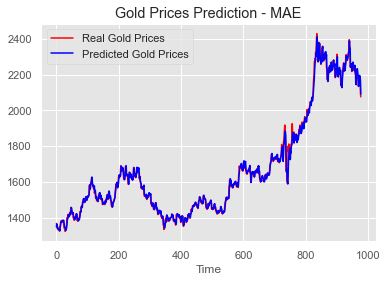

In [125]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'Real Gold Prices')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted Gold Prices')
plt.title('Gold Prices Prediction - MAE')
plt.xlabel('Time')
plt.legend()
plt.show()

Yes, the model performnce really good, but that is because in someway we already know the real values, so now let's continue with the second step, to do so, we can see the function below where it will predict the last 14 days as we didn't have those values in our dataset, and then we will take a look at the results with the real value

In [126]:
samples = upper_test - upper_train
samples

1006

In [144]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))


plus_days = 7
df_gold_real = df_model_gold.iloc[-samples-plus_days:, :].reset_index(drop=True).copy()
df_gold_predicted = df_model_gold.iloc[-timesteps - plus_days:, :].reset_index(drop=True).copy()
df_gold_aux = df_model_gold.iloc[-samples-plus_days: , :].reset_index(drop=True).copy()
lstm_last_14 = []

for i_time in range(0, timesteps+plus_days):
 
    test_set = df_gold_aux.iloc[i_time: testset_length + timesteps + i_time,1:2].values
    #print("Min value {} --- {}".format(i_time, df_gold_aux.iloc[testset_length + timesteps + i_time - plus_days, 1  ]))
    #print("Max value {} --- {}".format(i_time, df_gold_aux.iloc[testset_length + timesteps + i_time - plus_days, 1  ]))
    

    #Preprocessing data set
    test_set_norm = np.array(test_set).reshape(-1,1)

    #scaling
    scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set_norm))
    
    #creating input data
    X_test = []
    for i in range(timesteps, testset_length + timesteps):
        X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
    X_test = np.array(X_test)


    #reshaping
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    #prediction
    predicted_bcg_values_test_mae = model.predict(X_test, batch_size=batch_size)
    #print(predicted_bcg_values_test_mae.shape)

    #reshaping
    predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                           (predicted_bcg_values_test_mae.shape[0], 
                                            predicted_bcg_values_test_mae.shape[1]))

    #print(predicted_bcg_values_test_mae.shape)

    #inverse transform
    predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)
    
    print("Old value {} --- {}".format(i_time, df_gold_aux.iloc[testset_length + timesteps + i_time, 1  ]))
    #df_gold_aux.iloc[testset_length + timesteps + i_time, 1  ] = predicted_bcg_values_test_mae[-1, timesteps-1]
    df_gold_aux.iloc[testset_length + timesteps + i_time, 1  ] = predicted_bcg_values_test_mae[-1, 0]
    lstm_last_14.append(predicted_bcg_values_test_mae[-1, 0])
    print("New value {} --- {}".format(i_time, df_gold_aux.iloc[testset_length + timesteps + i_time, 1  ]))
    
    
    df_gold_predicted.iloc[i_time , 1  ] = predicted_bcg_values_test_mae[-1, timesteps-1]
    

Old value 0 --- 2129.472928884
New value 0 --- 2111.727294921875
Old value 1 --- 2141.8242890499
New value 1 --- 2127.898681640625
Old value 2 --- 2152.0146688343
New value 2 --- 2109.562744140625
Old value 3 --- 2145.6334609746
New value 3 --- 2128.736328125
Old value 4 --- 2144.1281999999997
New value 4 --- 2110.38037109375
Old value 5 --- 2150.1631407835002
New value 5 --- 2130.2939453125
Old value 6 --- 2149.2464
New value 6 --- 2110.83935546875
Old value 7 --- 2140.2523408570005
New value 7 --- 2132.529541015625
Old value 8 --- 2144.5284608904003
New value 8 --- 2111.27294921875
Old value 9 --- 2135.2519192018
New value 9 --- 2134.71875
Old value 10 --- 2157.5621889055997
New value 10 --- 2111.656005859375
Old value 11 --- 2134.6892389029
New value 11 --- 2136.9384765625
Old value 12 --- 2141.812021188
New value 12 --- 2111.993896484375
Old value 13 --- 2189.493
New value 13 --- 2139.20361328125


Above we can see the real values and the values predicted, please note that the proportion of real values and predicted values used to make other predictions decreases continuously as we run the model, therefore the last 7 predictions were based 100% in other predictions

In [136]:
#df_model_gold.iloc[ -1 , 1  ]

In [145]:
print('Residual sum of squares (MSE): %.2f' % mean_squared_error(df_gold_real.iloc[ -plus_days-timesteps: , 1  ], df_gold_aux.iloc[ -plus_days-timesteps: , 1  ]))

Residual sum of squares (MSE): 878.70


Our MSE in the last 14 days seems to be lower than the one we got with the LR model, let's plot the both predictions alogn with the real values and verify the performance, but before let's plot only the results of our LSTM model

In [146]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

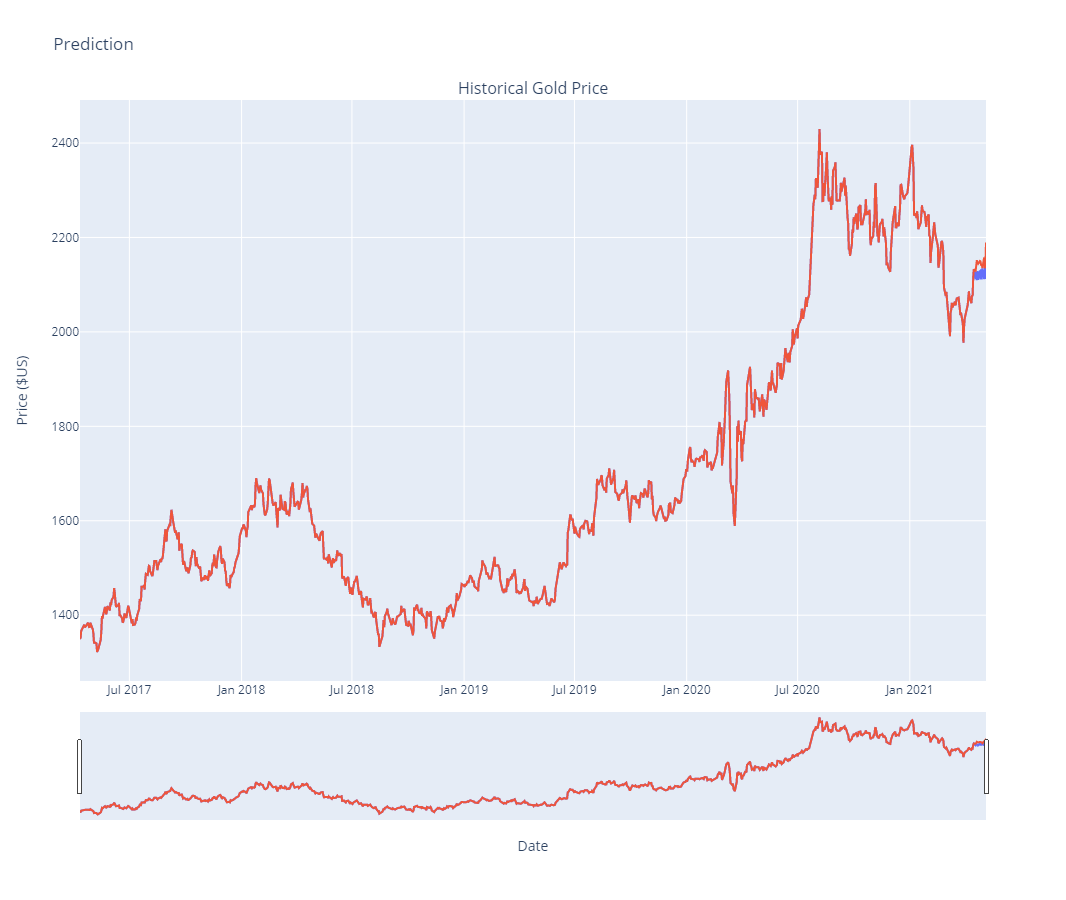

In [147]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=("Historical Gold Price", "Historical Revenue"))
fig.add_trace(go.Scatter(x=pd.to_datetime(df_gold_aux.Date, infer_datetime_format=True), y=df_gold_aux['Gold'].astype("float"), name="Predicted"), row=1, col=1)
fig.add_trace(go.Scatter(x=pd.to_datetime(df_gold_real.Date, infer_datetime_format=True), y=df_gold_real['Gold'].astype("float"), name="Real"), row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=1)
#fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
#fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
fig.update_layout(showlegend=False,
height=900,
title='Prediction',
xaxis_rangeslider_visible=True)
fig.show()

Seems really good!, now lets compare with the LR predictions

In [140]:
last_14_prices['Gold_LSTM'] = lstm_last_14

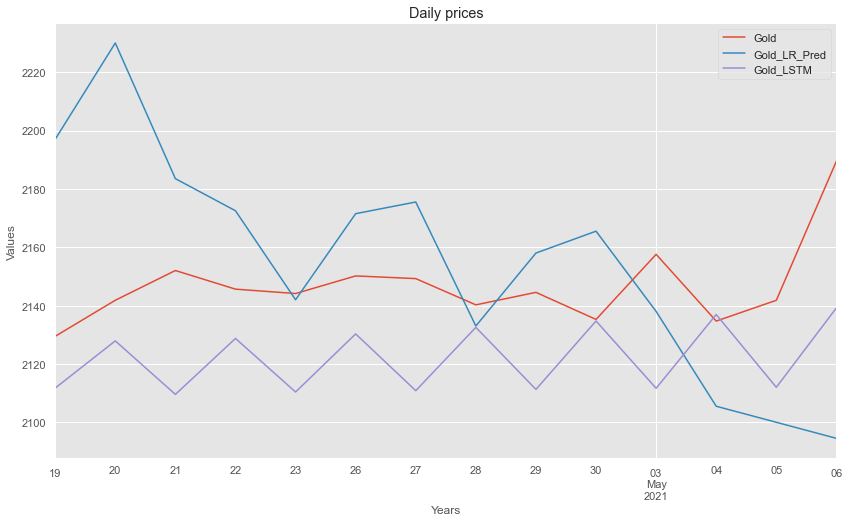

In [141]:
from sklearn import preprocessing

curves_graph = ['Date', 'Gold', 'Gold_LR_Pred', 'Gold_LSTM']
df_plot = last_14_prices.loc[: , curves_graph].set_index('Date')
#df_plot=(df_plot-df_plot.mean())/df_plot.std()

df_plot.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Daily prices')
plt.ylabel('Values')
plt.xlabel('Years')


plt.show() 

## Conclusion <a name="conclusion"></a>

Besides we got a R2-score really close to 1, and that the predictions of the LR model are based on real values, we still could get better results with the Timeseries forecasting model, the MSE of each model performing on the last 14 days speak for itself:
* Time series Residual sum of squares (MSE): 878.70
* LR model Residual sum of squares (MSE): 2025.19

Also, looking at the curve of the results, the Timeseires forecasting predictions was able to follow the trend of the real values whereas the LR model was going in the opposite direction of the trend, which could bring real problems for a possible trader who might look up at the predictions looking for a second view.

We could perform even better results if we had more data available and for sure we can modify the LSTM model to get closer to the real values, adding another layer or looking up for a better optimizer